In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Customer Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df.shape

(7043, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [15]:
# here we replace white spaces with '0' and change its type.
df['MonthlyCharges'] = df['MonthlyCharges'].replace(' ','0')
df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
df.duplicated().sum()

0

In [21]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [23]:
df['customerID'].duplicated().sum()

0

In [25]:
# here we convert 0,1 into Yes - No
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0:'No',1:'Yes'})

# From here Start Our EDA :
## woking on Churn :

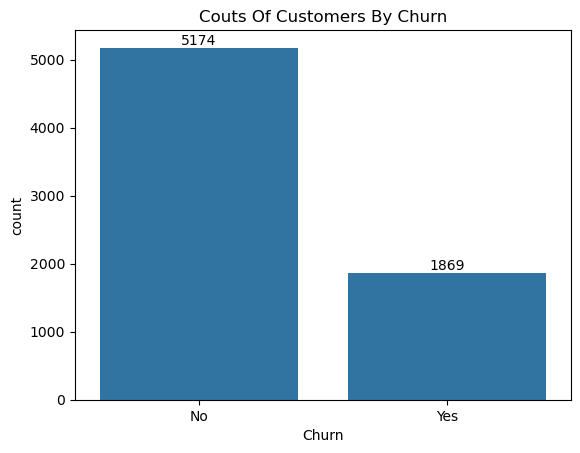

In [28]:
ax= sns.countplot(x='Churn',data=df)
plt.title('Couts Of Customers By Churn')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

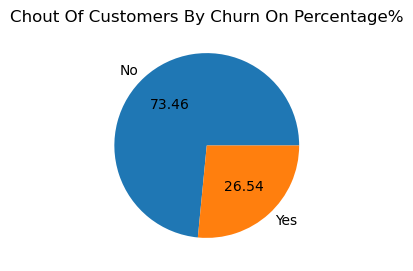

In [30]:
plt.figure(figsize=(3,3))
chu = df.groupby('Churn')['TotalCharges'].count()
plt.title('Chout Of Customers By Churn On Percentage%')
plt.pie(chu,labels=chu.index,autopct='%.2f')
plt.show()

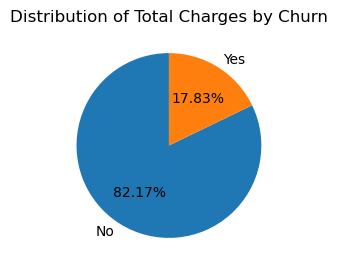

In [48]:

# Remove extra spaces
#df['TotalCharges'] = df['TotalCharges'].str.strip()

# Convert to numeric (invalid parsing will become NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows where conversion failed (NaN)
df = df.dropna(subset=['TotalCharges'])

# Now group and plot
chu = df.groupby('Churn')['TotalCharges'].sum()
#
plt.figure(figsize=(3,3))
plt.pie(chu, labels=chu.index, autopct='%1.2f%%', startangle=90)
plt.title('Distribution of Total Charges by Churn')
plt.show()

# The Above Graphs Shows About Churn Data:
- we have 73.46 churn on (No) in Counts. (Exist)
- we Have 26.54 churn on (Yes) in counts. (Leave)
- we have 82.17 churn on (Yes) in Sum (Exist)
- we Have 17.83 churn on (Yes) in Sum. (Leave)

# working on gender :

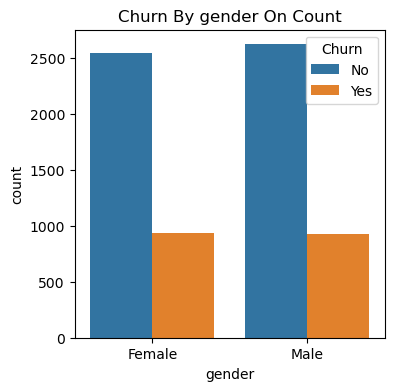

In [270]:
plt.figure(figsize=(4,4))
plt.title('Churn By gender On Count')
sns.countplot(x='gender',data=df,hue='Churn')
plt.show()

   gender  TotalCharges
0  Female     7952354.2
1    Male     8103814.5


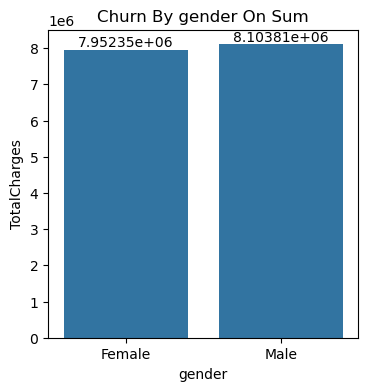

In [80]:
plt.figure(figsize=(4,4))
plt.title('Churn By gender On Sum')
ax = df.groupby('gender')['TotalCharges'].sum().reset_index()
print(ax)
s = sns.barplot(data=ax,x='gender',y='TotalCharges')
for i in s.containers:
    s.bar_label(i)
plt.show()

# Litle High In The Male Churn. 

# Working on Scienior Citizen :

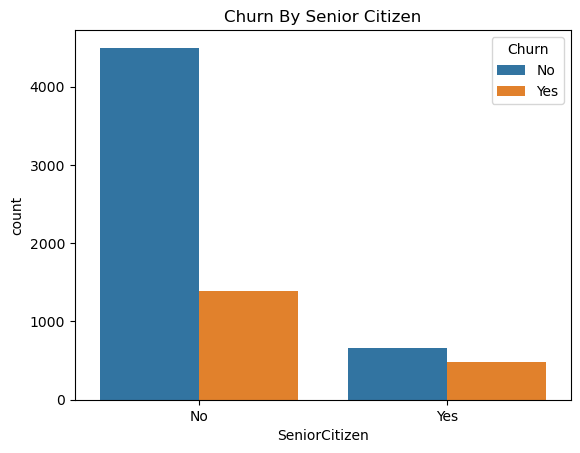

In [268]:
sns.countplot(x='SeniorCitizen',data=df,hue='Churn')
plt.title('Churn By Senior Citizen')
plt.show()

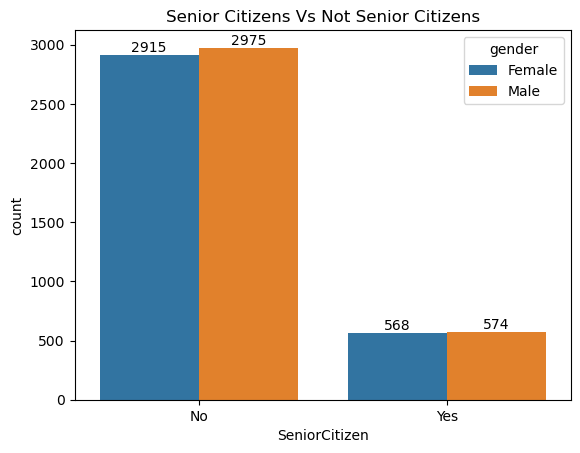

In [260]:
ax = sns.countplot(x='SeniorCitizen',data=df,hue='gender')
plt.title('Senior Citizens Vs Not Senior Citizens')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

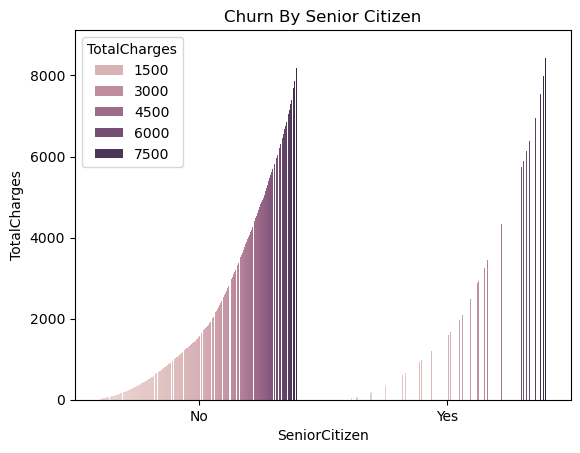

In [107]:
ax = df.groupby('SeniorCitizen')['TotalCharges'].sum()
sns.barplot(data=df,x='SeniorCitizen',y='TotalCharges',hue='TotalCharges')
plt.title('Churn By Senior Citizen')
plt.show()

# Here we have More Churn In Senier Citizens Of Yes.

# Working on Tenure :

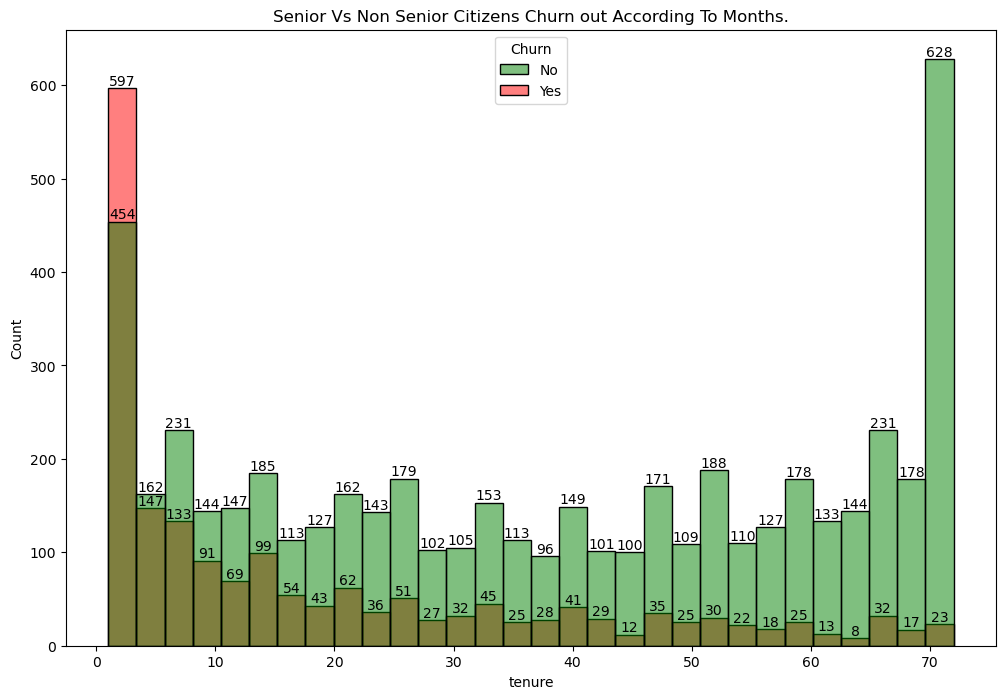

In [274]:
plt.figure(figsize=(12,8))
ax=sns.histplot(x='tenure',data=df,hue='Churn',bins=30,palette=['green','red'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Senior Vs Non Senior Citizens Churn out According To Months.')
plt.show()

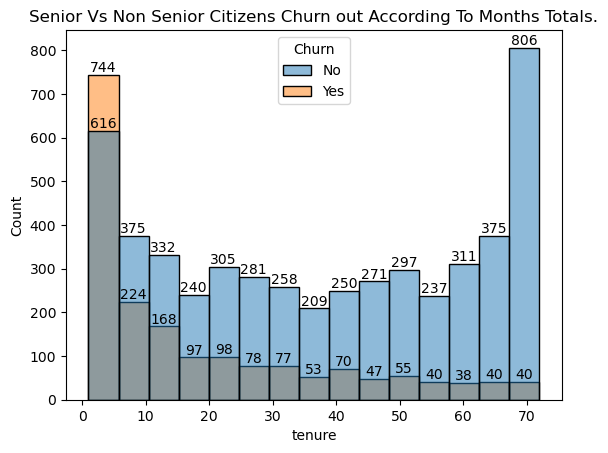

In [254]:

plt.title('Senior Vs Non Senior Citizens Churn out According To Months Totals.')
ten = df.groupby('tenure')['TotalCharges'].sum()
ax = sns.histplot(x='tenure',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

# In Satrt 10 months the immature customers are churn out very early using 1 to 2 times services.But in later months we have our loyal customers stay with us for long time

# working on contract :

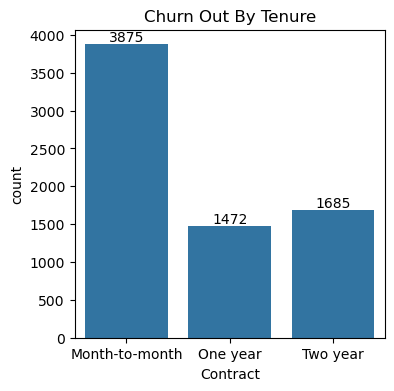

In [214]:
plt.figure(figsize=(4,4))
plt.title('Churn Out By Tenure')
ax = sns.countplot(x='Contract',data=df)
ax.bar_label(ax.containers[0])
plt.show()

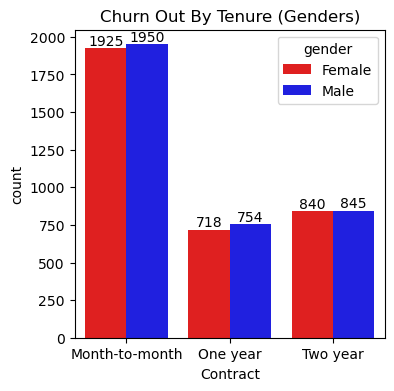

In [252]:
plt.figure(figsize=(4,4))
plt.title('Churn Out By Tenure (Genders)')
ax = sns.countplot(x='Contract',data=df,hue='gender',palette=['red','blue'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

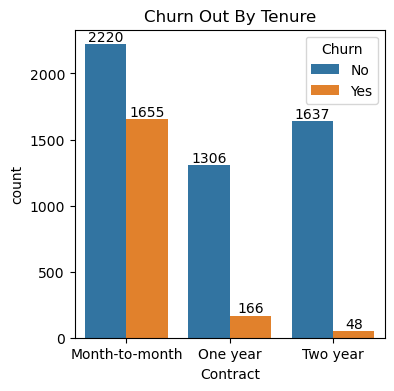

In [250]:
plt.figure(figsize=(4,4))
plt.title('Churn Out By Tenure')
ax = sns.countplot(x='Contract',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

In The Above graph Shows That A Month To Month Customers Are Churn Out Very Fast In That Both Male And Female Are Same In Count .
One Year And Two Year Contracter Are Less  Churn Out With Passage Of Time.

In [223]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

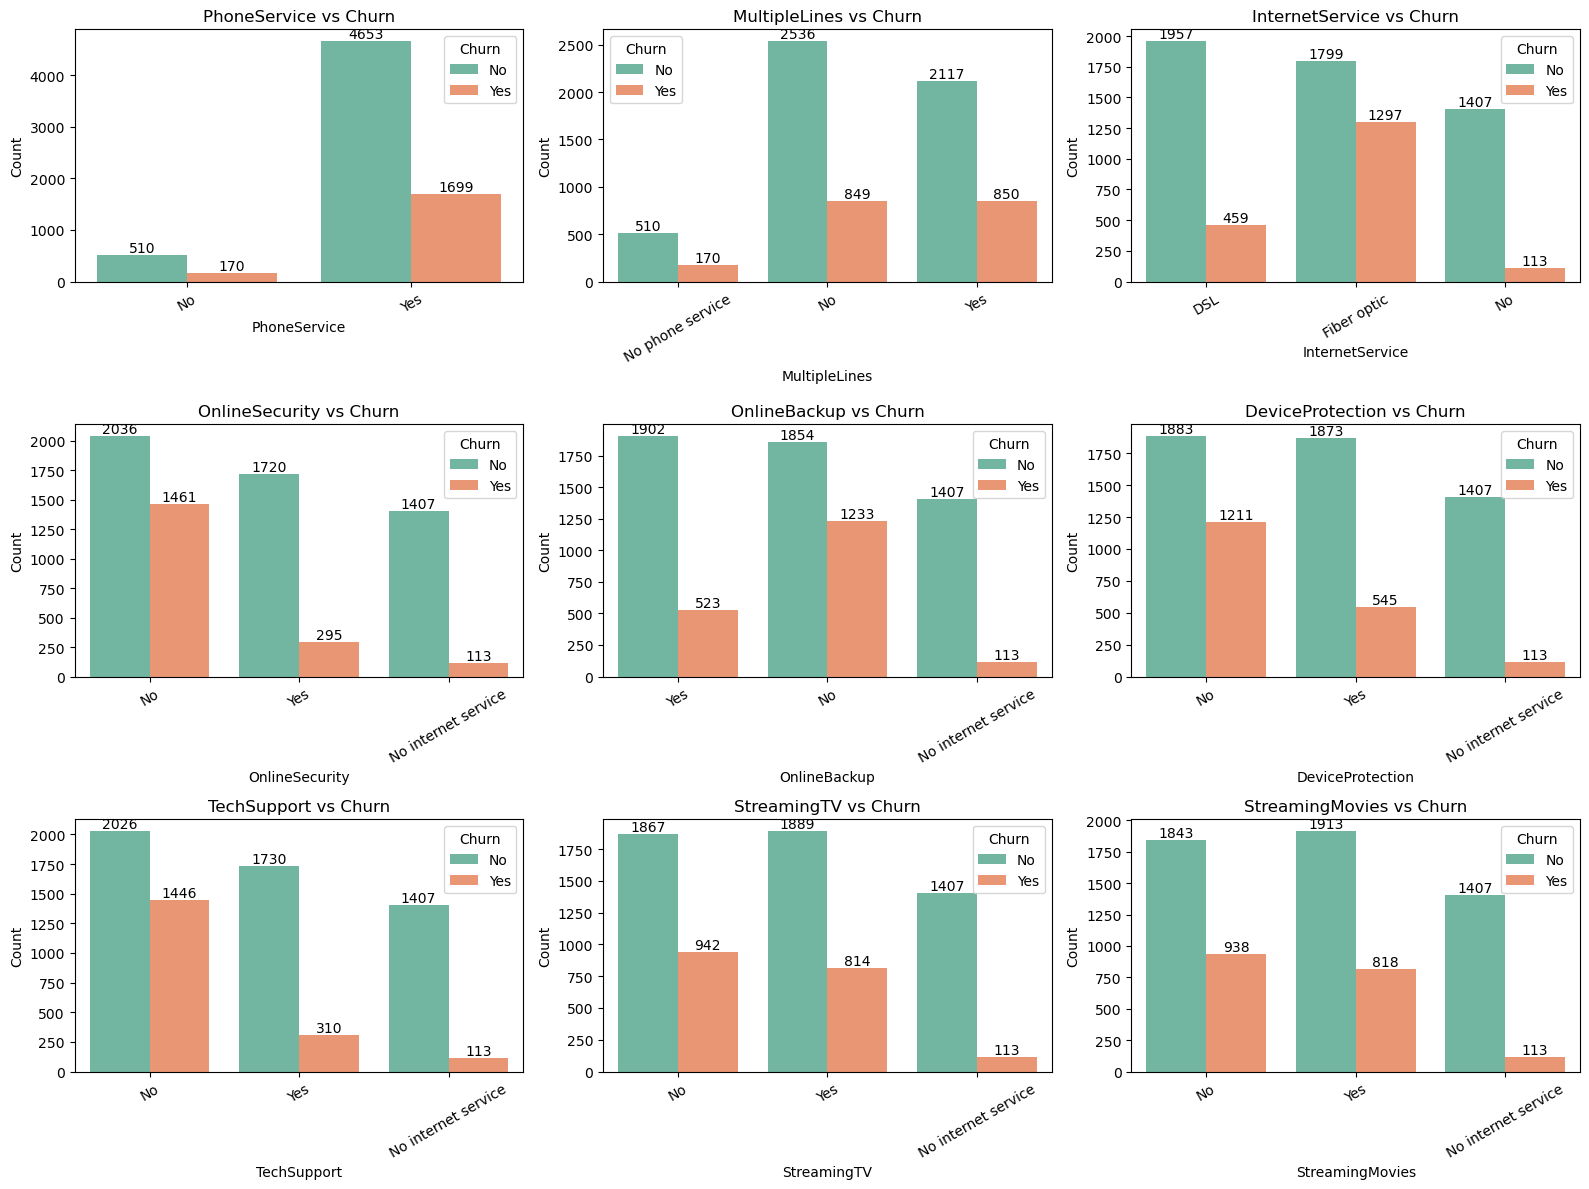

In [248]:
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
        'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(16,12))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)   # 3x3 grid
    ax = sns.countplot(data=df, x=col, hue='Churn', palette='Set2')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=30)
    plt.xlabel(col)
    plt.ylabel("Count")
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
plt.tight_layout()
plt.show()


# The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable. The charts emphasize the relationship between service usage and customer churn."

# Working On payment method

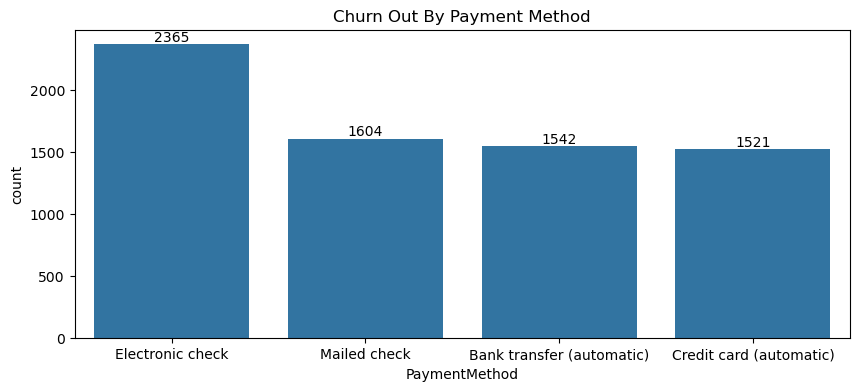

In [244]:
plt.figure(figsize=(10,4))
plt.title('Churn Out By Payment Method')
ax = sns.countplot(x='PaymentMethod',data=df)
ax.bar_label(ax.containers[0])
plt.show()

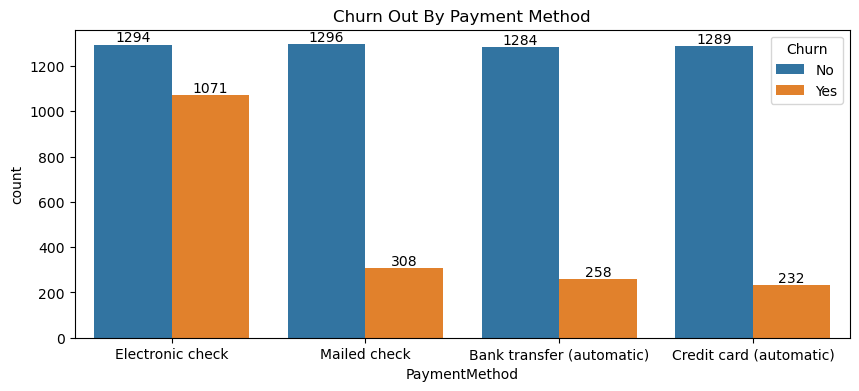

In [246]:
plt.figure(figsize=(10,4))
plt.title('Churn Out By Payment Method')
ax = sns.countplot(x='PaymentMethod',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

# Customers are churnd more using Electronic Cheack Payment Methods

# Detalied  Summary On This Annalysis :

📊 Telco Customer Churn – Summary & Insights
1. Demographics

Gender: Balanced distribution (Male ≈ 50%, Female ≈ 50%). No strong churn difference by gender.

Senior Citizens: ~16% of customers are Senior Citizens. They have a higher churn rate (≈41%) compared to younger customers (~23%).

Partner/Dependents:

Customers with no partner or dependents churn more (≈32%), while those with partners/dependents churn less (≈20%).

2. Services Subscription

Phone Service: Almost everyone has it (>90%). Churn difference is small.

Multiple Lines:

With multiple lines → churn ≈ 29%

Without multiple lines → churn ≈ 25%

Internet Service:

Fiber optic users churn the most (≈42%)

DSL users churn less (≈20%)

Customers with no internet churn very low (≈7%)

Online Services (Security, Backup, Protection, Tech Support):

Customers without these add-ons churn 35–45%,

Customers with these add-ons churn only 15–20%.

Biggest difference: Tech Support – No Tech Support churn ≈ 42% vs With Tech Support ≈ 15%.

Streaming TV/Movies:

Streaming users churn slightly more (≈30%) than non-streamers (≈25%).

3. Account & Contract Information

Contract Type:

Month-to-Month contracts churn the most (~43%)

1-year contract churn ≈ 11%

2-year contract churn ≈ 3%

🔑 Contract type is the strongest churn predictor.

Paperless Billing:

With paperless billing → churn ≈ 33%

Without → churn ≈ 20%

Payment Method:

Electronic check has the highest churn (≈45%)

Other methods (credit card, bank transfer, mailed check) churn much lower (15–20%).

4. Financial Factors

Monthly Charges:

High monthly charges (> $80) = higher churn (~40%)

Low monthly charges (< $40) = lower churn (~15%)

Total Charges:

Customers with low total charges (< $1000) churn more (~40%).

Long-tenured customers (high total charges) churn less (~10%).

5. Churn Overview

Overall Churn Rate: ~27% of customers have churned.

Main Reasons for Churn (in % impact):

Month-to-Month Contracts → +43% churn risk

Fiber Optic Internet → +42% churn risk

No Online Security / Tech Support → +40–45% churn risk

Electronic Check Payment → +45% churn risk

High Monthly Charges → +40% churn risk

🎯 Key Takeaways

✔ Customers with long-term contracts, bundled services (security, backup, tech support), and low monthly charges are the most loyal.
✔ Month-to-Month + Fiber Optic + No Support Services + Electronic Check + High Charges = 🚩 High churn group.
✔ Retention strategies should focus on:

Offering discounts on long-term contracts

Bundling online security/tech support at lower cost

Reducing dependency on electronic check payments

👉 This is your all-in-one insight summary (with percentages) to directly use in your report/presentation.